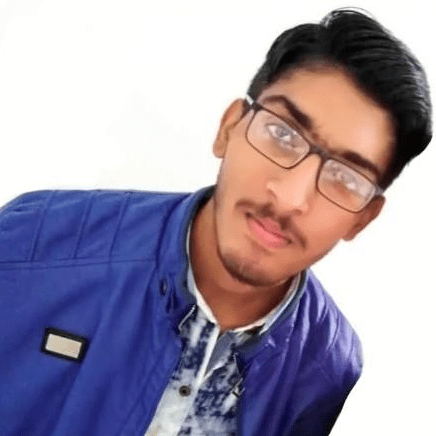

**Implemented By Muhammad Hanan Asghar**

**Importing Libraries**

In [112]:
!pip install keras

In [113]:
import numpy as np
import keras
from keras.models import Model
from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from keras import backend as k

**Importing and Loading Dataset**

In [114]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [115]:
print("Shape of Training",x_train.shape)
print("Shape of Testing",x_test.shape)

Shape of Training (60000, 28, 28)
Shape of Testing (10000, 28, 28)


**Converting out Dataset to Single Channel**

In [116]:
img_rows, img_cols=28, 28
  
if k.image_data_format() == 'channels_first': 
  #reshape dataset to have a single channel
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
   inpx = (1, img_rows, img_cols) 
else:
  #reshape dataset to have a single channel
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
   inpx = (img_rows, img_cols, 1)

In [117]:
print("Shape of Training",x_train.shape)
print("Shape of Testing",x_test.shape)

Shape of Training (60000, 28, 28, 1)
Shape of Testing (10000, 28, 28, 1)


In [118]:
# converting integers to float
#convert from integers to floats
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

# Nor. 0 to 1
x_train /= 255
x_test /= 255

In [119]:
# Now converting To categorical or means one hot encoding
# convert class vectors to binary class matrices  OR one hot encode target values
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test)

In [120]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
# To prevent overfitting 
layer4 = Dropout(0.5)(layer3)
 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6)

In [122]:
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 [==============================] - 2s 20ms/step - loss: 0.4412 - accuracy: 0.8781
Epoch 2/12
120/120 [==============================] - 2s 20ms/step - loss: 0.1172 - accuracy: 0.9668
Epoch 3/12
120/120 [==============================] - 2s 20ms/step - loss: 0.0796 - accuracy: 0.9770
Epoch 4/12
120/120 [==============================] - 2s 20ms/step - loss: 0.0610 - accuracy: 0.9825
Epoch 5/12
120/120 [==============================] - 2s 20ms/step - loss: 0.0508 - accuracy: 0.9853
Epoch 6/12
120/120 [==============================] - 2s 20ms/step - loss: 0.0422 - accuracy: 0.9875
Epoch 7/12
120/120 [==============================] - 2s 20ms/step - loss: 0.0381 - accuracy: 0.9890
Epoch 8/12
120/120 [==============================] - 2s 20ms/step - loss: 0.0327 - accuracy: 0.9901
Epoch 9/12
120/120 [==============================] - 2s 20ms/step - loss: 0.0297 - accuracy: 0.9916
Epoch 10/12
120/120 [==============================] - 2s 20ms/step - loss: 0.0255 - accura

In [124]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Loss=', score[0]) 
print('Accuracy=', score[1])

Loss= 0.026301587000489235
Accuracy= 0.9908999800682068


In [135]:
#sinle Value predication in number
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[575])))

9


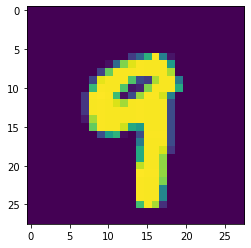

In [138]:
#sinle Value predication in graph (plot)
import matplotlib.pyplot as plt
plt.imshow(x_test[575].reshape(28, 28))
plt.show()

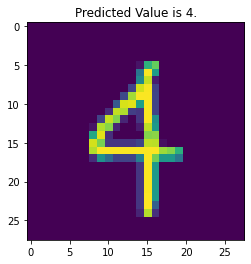

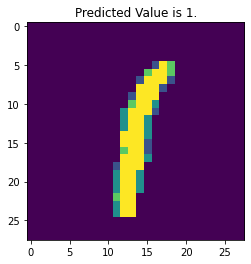

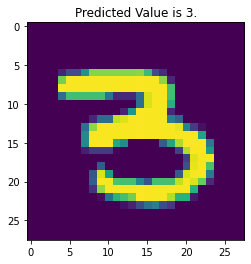

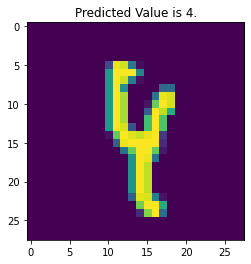

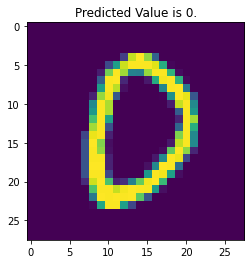

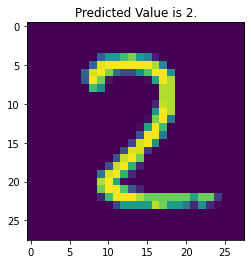

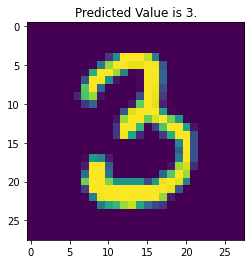

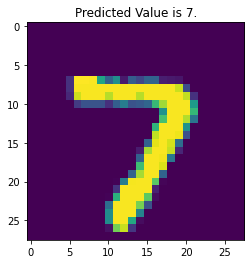

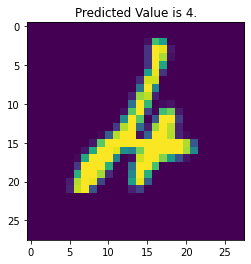

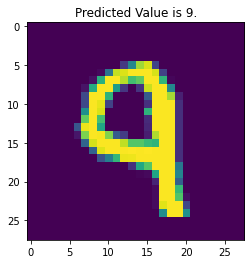

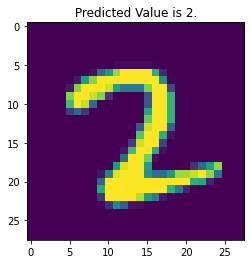

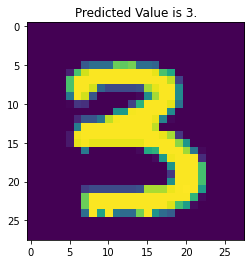

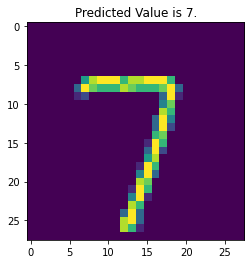

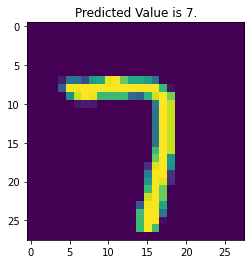

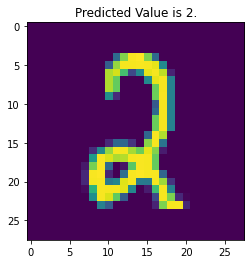

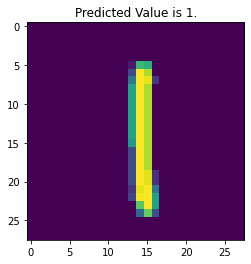

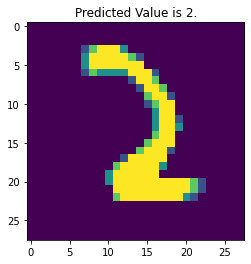

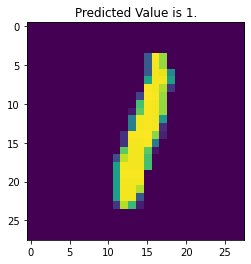

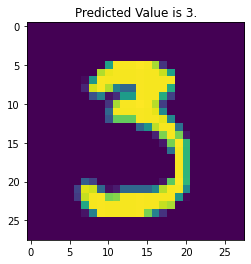

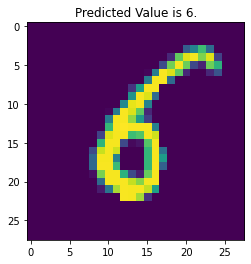

In [141]:
import random
for _ in range(20):
  value = random.randint(0,700)
  code = np.argmax(np.round(predictions[value]))
  plt.imshow(x_test[value].reshape(28, 28))
  plt.title(f"Predicted Value is {code}.")
  plt.show()